#### Import The Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [37]:
IMAGE_SIZE = 256
CHANNELS = 3

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=16,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1050 images belonging to 3 classes.


In [39]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [40]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [49]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=16,
        class_mode="sparse"
)

Found 150 images belonging to 3 classes.


In [50]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=16,
        class_mode="sparse"
)

Found 300 images belonging to 3 classes.


#### Building the Model

In [51]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

# Here Convolution and Max Pooiling layers are used
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    #Hidden layer 
    layers.Dense(64, activation='relu'),
    #Output Layer
    layers.Dense(n_classes, activation='softmax'),
])

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 64)       

### Compiling the Model

In [45]:
#We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [52]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [54]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=None,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Train for 47 steps, validate for 6 steps
Epoch 1/20
47/47 [==============================] - 18s 373ms/step - loss: 1.0981 - accuracy: 0.3351 - val_loss: 1.0590 - val_accuracy: 0.3646
Epoch 2/20
47/47 [==============================] - 17s 353ms/step - loss: 0.8685 - accuracy: 0.5724 - val_loss: 0.5512 - val_accuracy: 0.7708
Epoch 3/20
47/47 [==============================] - 17s 355ms/step - loss: 0.4636 - accuracy: 0.8112 - val_loss: 0.3403 - val_accuracy: 0.8646
Epoch 4/20
47/47 [==============================] - 17s 362ms/step - loss: 0.3981 - accuracy: 0.8378 - val_loss: 0.3125 - val_accuracy: 0.8854
Epoch 5/20
47/47 [==============================] - 18s 373ms/step - loss: 0.3034 - accuracy: 0.8686 - val_loss: 0.3414 - val_accuracy: 0.8854
Epoch 6/20
47/47 [==============================] - 17s 371ms/step - loss: 0.3170 - accuracy: 0.8740 - val_loss: 0.2991 - val_accuracy: 0.8958
Epoch 7/20
47/47 [==============================] - 17s 367ms/step - loss: 0.3073 - accuracy: 0.8737 

In [55]:
scores = model.evaluate(test_generator)

19/19 [==============================] - 4s 232ms/step - loss: 0.1135 - accuracy: 0.9667


#### Plotting the Accuracy and Loss Curves

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

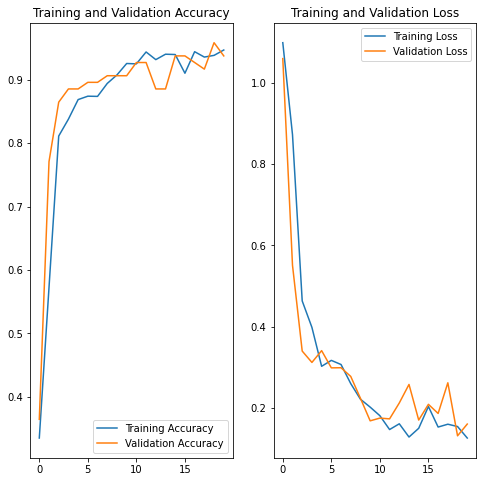

In [58]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Run prediction on a sample image

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


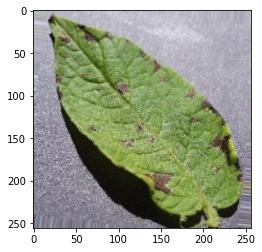

In [75]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

#### Write a function for inference

In [76]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

## Now run inference on few sample images

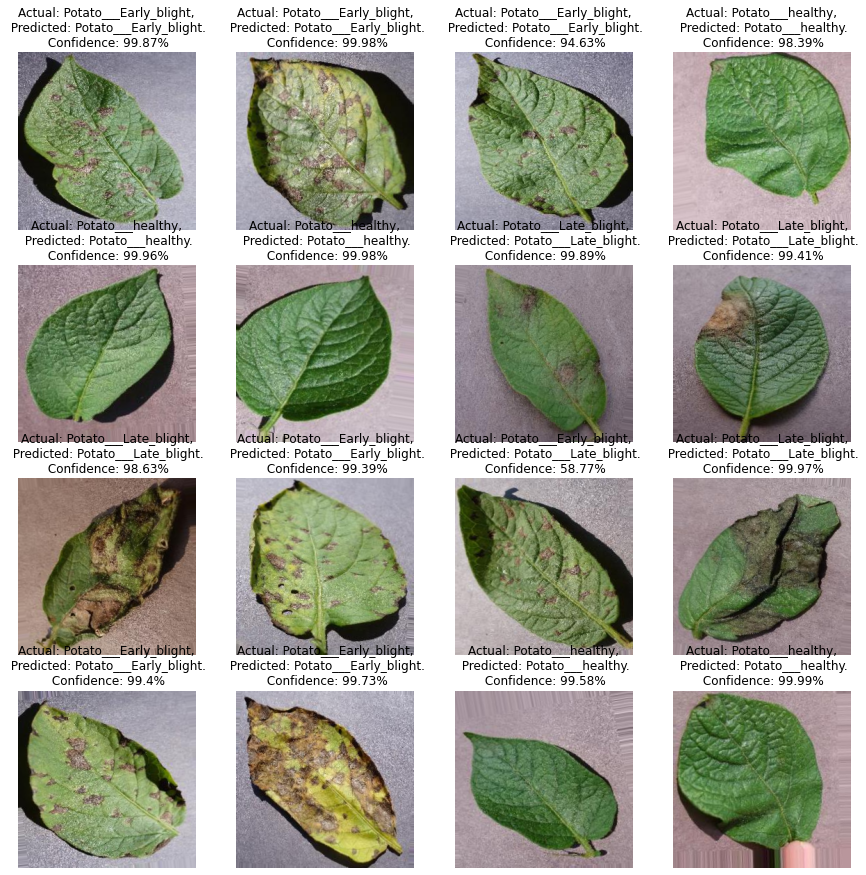

In [79]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

## Saving the Model

In [80]:
# Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

model.save("potatoes.h5")